# Homework 9

## 1. Closed Laptop Questions. 10 POINTS
Provide the binary values for each bit in the following numpy dtypes:  
    a. `np.int8(7)`   
    b. `np.int16(7)`   
    c. `np.uint8(4)`    

    a. 00000111
    b. 0000000000000111
    c. 00000100

## 2. Closed Laptop Questions. 10 POINTS
Provide the strides for each of the folling numpy arrays:  
a. `np.array([[0, 1, 2], [3, 4, 5]], dtype='int32')`  
b. `np.array([[0, 1, 2], [3, 4, 5]], dtype='uint64')`  
c. `np.array([0, 1, 2, 3, 4, 5], dtype='uint32')`  

    a. (12,4)
    b. (24,8)
    c. (4,)

## 3. Consider the following Image. 
![img](whereswaldo.jpg)

### 10 POINTS. 
Consider that you can read this image into python and create a numpy array as follows:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


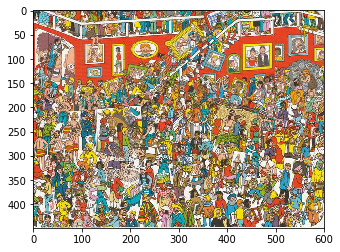

In [4]:
from scipy.misc.pilutil import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
waldo = imread('whereswaldo.jpg')
plt.imshow(waldo)

In [5]:
waldo.shape

(449, 600, 3)

### Use array slicing/indexing to obtain...
Look on the red wall. There is an oval frame on the wall containing a man with a red wiggly mustache. Obtain a smaller image of the peron in the frame with the red mustache. Try to get the crop as tight as possible. Save this crop as an object named `red_mustache`.

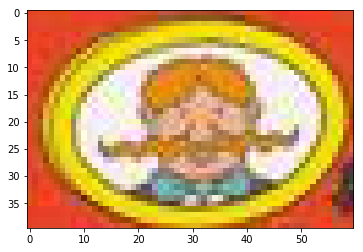

In [6]:
waldo = np.array(waldo, dtype = 'uint32')
red_mustache = waldo[60:100,200:260]
plt.imshow(red_mustache)

### 10 POINTS.
What is the dimensions of this crop?  
What are the strides of this crop?

In [7]:
print("The dimensions are: ", red_mustache.shape)
print("The strides are: ", red_mustache.strides)

The dimensions are:  (40, 60, 3)
The strides are:  (7200, 12, 4)


### 10 POINTS.
On the same wall is a frame with a man and woman in a picture. Using the same dimensions as above, crop the original photo so that you get a crop of the man and woman in the picture on the wall. Save this crop as `man_woman`. It's okay if this picture isn't cropped as well, but it should have both people in the crop **and have the same dimensions** as the `red_mustache` crop.

In [18]:
man_woman = waldo[75:115, 435:495]

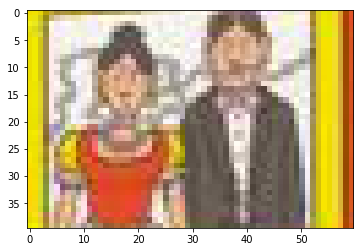

In [19]:
plt.imshow(man_woman)

### 10 POINTS.
Combine these two images to make one numpy array. Do this in a way that makes it easy for someone who uses the numpy array to quickly understand that it is two distinct arrays.

In [145]:
two_img = np.vstack((red_mustache, man_woman))
print(two_img)

[[[149  77  37]
  [165  77  41]
  [196  85  57]
  ...
  [207 125 111]
  [225 143 131]
  [213 133 122]]

 [[129 119   0]
  [145 110   0]
  [144  80   0]
  ...
  [251 187 175]
  [219 156 141]
  [202 139 124]]

 [[198 213   6]
  [223 216  14]
  [231 198  21]
  ...
  [154 115 100]
  [199 162 144]
  [229 194 174]]

 ...

 [[222  74  60]
  [233  82  65]
  [232  73  51]
  ...
  [180 144 158]
  [103  66  83]
  [116  79  97]]

 [[195  86  53]
  [193  79  42]
  [202  79  37]
  ...
  [146 125 132]
  [ 84  63  72]
  [ 97  73  86]]

 [[172 123  91]
  [143  89  53]
  [155  92  49]
  ...
  [ 96  92  80]
  [ 88  84  73]
  [112 105  95]]]


## Ordinary Least Squares. 40 Points.
Create a class called `OLS`. 
1. When creating an object from this new type, `OLS` should expect two numpy arrays: `x` and `y`. 
2. For this class, create a method called `beta_coef`. This function should take an optional parameter called `intercept`. If true this function will first add the intercept data to `x`, otherwise, if false, it will assume that information is already present. This function should then return the $\hat{\beta}$ coefficient vector of the least-squares estimate from a linear model.
3. Create a third method called ssr (model sum of squares). This method will calculate the `ssr` as follows:  
$(\hat{y}-\bar{y}_n)^{T}(\hat{y}-\bar{y_{n}})$  

This notation $y_{n}$ denotes a vector of means size $n$. $\hat{y}$ denotes a predicted value.

In [68]:
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm

class OLS:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def beta_coef(self, intercept=None):
        if intercept is not None:
#             print(self.x)
            self.x = sm.add_constant(self.x)
        return inv(self.x.T.dot(self.x)).dot(self.x.T).dot(self.y)
    def ssr(self):
        ybar = np.mean(self.y)
#         print("x is: ", self.x.shape)
#         print("beta coefficients are: ", self.beta_coef(self.beta_coef))
        yhat = np.matmul(self.x, self.beta_coef(self.beta_coef()))
#         print(yhat)
        return np.matmul((yhat-ybar).T,(yhat-ybar))

np.random.seed(100)
x = np.random.randn(25) + 2
y = 2*x**2-4
intercept = np.random.randn(25)
o = OLS(x,y)
xi = sm.add_constant(x)
o_i = OLS(xi,y)
print("------------------------------xi with intercept------------------------------")
print(o_i.beta_coef())
print("------------------------------SSR------------------------------")
print(o_i.ssr())
print("------------------------------x without intercept------------------------------")
print(o.beta_coef(intercept))
print("------------------------------SSR------------------------------")
print(o.ssr())


------------------------------xi with intercept------------------------------
[-11.06243987   8.22368239]
------------------------------SSR------------------------------
1174.4075177804957
------------------------------x without intercept------------------------------
[-11.06243987   8.22368239]
------------------------------SSR------------------------------
1174.4075177804957
